In [1]:
## Code from https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
## Code from https://machinelearningmastery.com/making-predictions-with-multilinear-regression-in-pytorch/

In [17]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## EDA

In [3]:
## import data from the master folder
data = pd.read_csv(r'C:\Users\Siyang\Documents\projects\fpl\Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\2021-22\cleaned_players.csv')

In [4]:
data.head()

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Bernd,Leno,0,0,10,360,9,0.0,85.0,0.0,0,69,8.5,1,0,0,0.8,45,GK
1,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.5,40,GK
2,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,63,MID
3,Pierre-Emerick,Aubameyang,4,1,44,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3,1.2,96,FWD
4,Cédric,Soares,1,1,48,1481,27,306.5,246.0,76.0,3,292,63.0,3,0,3,0.4,42,DEF


In [5]:
selected_attributes = ['goals_scored', 'assists',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards']

In [6]:
attributes = data[selected_attributes]
attributes

,goals_scored,assists,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards
0,0,0,360,9,0.0,85.0,0.0,0,69,8.5,1,0,0
1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0
2,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0
3,4,1,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3
4,1,1,1481,27,306.5,246.0,76.0,3,292,63.0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0
733,0,0,360,6,4.3,59.6,28.0,0,52,9.2,0,0,1
734,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0
735,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0


In [7]:
total_points = data['total_points']
total_points

0      10
1       0
2       0
3      44
4      48
       ..
732     0
733     6
734     0
735     0
736    20
Name: total_points, Length: 737, dtype: int64

## Model Training

In [8]:
import torch
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        # using mm module for matrix multiplication 
        y_pred = self.linear(x)
        return y_pred

In [9]:
inputDim = 13         
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [10]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [13]:
attributes_norm = (attributes - attributes.mean()) /attributes.std()
total_points_norm = (total_points - total_points.mean()) /total_points.std()

In [14]:
# Converting inputs and labels to tensors
if torch.cuda.is_available():
    inputs = torch.tensor(attributes_norm.values, dtype=torch.float32).cuda()
    labels = torch.tensor(total_points_norm.values, dtype=torch.float32).cuda()

else:
    inputs = torch.tensor(attributes_norm.values, dtype=torch.float32)
    labels = torch.tensor(total_points_norm.values, dtype=torch.float32)
labels = labels[:, None]


In [16]:
loss_array = []
for epoch in range(epochs):
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    loss_array.append(loss.item())
    # print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(1.0064, grad_fn=<MseLossBackward0>)
tensor(0.7881, grad_fn=<MseLossBackward0>)
tensor(0.6365, grad_fn=<MseLossBackward0>)
tensor(0.5305, grad_fn=<MseLossBackward0>)
tensor(0.4557, grad_fn=<MseLossBackward0>)
tensor(0.4021, grad_fn=<MseLossBackward0>)
tensor(0.3630, grad_fn=<MseLossBackward0>)
tensor(0.3340, grad_fn=<MseLossBackward0>)
tensor(0.3119, grad_fn=<MseLossBackward0>)
tensor(0.2945, grad_fn=<MseLossBackward0>)
tensor(0.2805, grad_fn=<MseLossBackward0>)
tensor(0.2689, grad_fn=<MseLossBackward0>)
tensor(0.2589, grad_fn=<MseLossBackward0>)
tensor(0.2501, grad_fn=<MseLossBackward0>)
tensor(0.2422, grad_fn=<MseLossBackward0>)
tensor(0.2350, grad_fn=<MseLossBackward0>)
tensor(0.2283, grad_fn=<MseLossBackward0>)
tensor(0.2221, grad_fn=<MseLossBackward0>)
tensor(0.2161, grad_fn=<MseLossBackward0>)
tensor(0.2105, grad_fn=<MseLossBackward0>)
tensor(0.2051, grad_fn=<MseLossBackward0>)
tensor(0.1999, grad_fn=<MseLossBackward0>)
tensor(0.1950, grad_fn=<MseLossBackward0>)
tensor(0.19

## Result Analysis

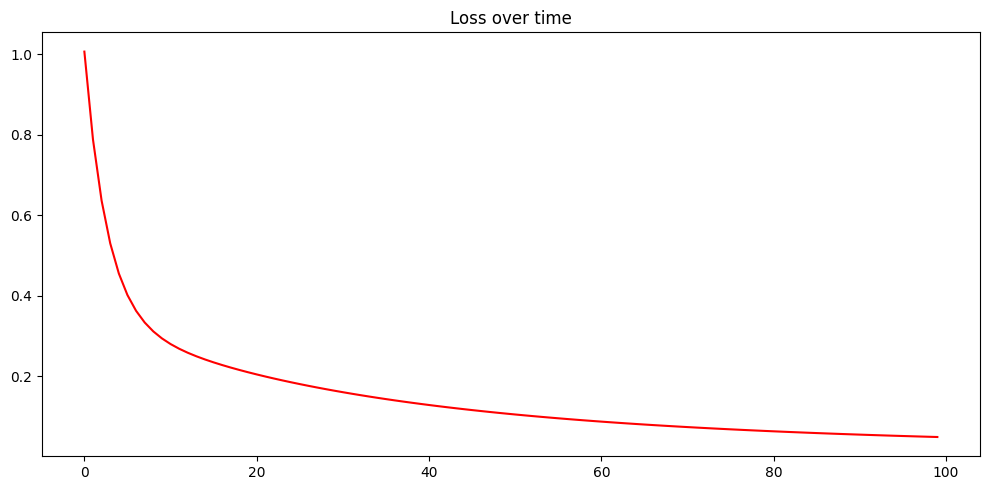

In [24]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

x = np.array([i for i in range(len(loss_array))])
y = np.array(loss_array)
plt.title("Loss over time")
plt.plot(x, y, color="red")

plt.show()

In [21]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(inputs).cpu().data.numpy()
    else:
        predicted = model(inputs).data.numpy()
    print(predicted)

[[-6.41332030e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [ 3.25151324e-01]
 [ 1.98456123e-01]
 [ 1.16967535e+00]
 [ 8.60938013e-01]
 [-6.87634826e-01]
 [-8.29847217e-01]
 [-8.12369525e-01]
 [-3.08552653e-01]
 [-6.60856962e-01]
 [-2.76684314e-01]
 [ 8.45058143e-01]
 [ 7.39318430e-01]
 [-6.54197671e-03]
 [-8.29847217e-01]
 [ 1.28946692e-01]
 [ 1.44803572e+00]
 [ 3.09197903e+00]
 [ 1.57824028e+00]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [ 1.18738973e+00]
 [-8.29847217e-01]
 [ 1.08013988e+00]
 [ 1.95739940e-02]
 [ 6.82380944e-02]
 [-8.03827047e-01]
 [-8.04743886e-01]
 [-8.29847217e-01]
 [ 2.14065862e+00]
 [ 1.00414515e+00]
 [-8.29847217e-01]
 [ 3.96681458e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-8.29847217e-01]
 [-1.60377264e-01]
 [-8.10432971e-01]
 [-8.29847217e-01]
 [ 1.14520156e+00]
 [-8.29847217e-01]
 [-6.74993634e-01]
 [-6.7257195

In [22]:
total_points.head()

0    10
1     0
2     0
3    44
4    48
Name: total_points, dtype: int64

In [23]:
(predicted * total_points.std() + total_points.mean())[0:5]

array([[11.069733 ],
       [ 1.7945251],
       [ 1.7945251],
       [58.622047 ],
       [52.388466 ]], dtype=float32)